# What genres of disney movies generate the most gross?


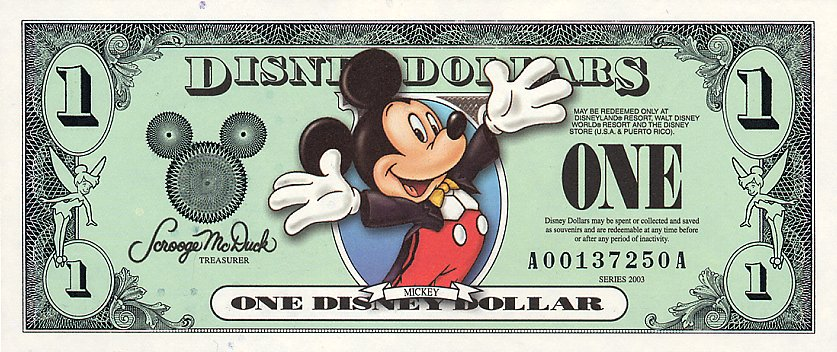

# Introduction

**This is a short EDA over the "Disney Movies 1937-2016 Gross Income" dataset. We will be using the OMDB Api to populate the missing genres in the dataset to get a more accurate read on which genre's generate the most gross.** 

# Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv("/kaggle/input/data-set/disney_movies_total_gross.csv")
print(df.head())

In [ ]:
print(df.info())

**The columns of interest are the "genre" and "inflation_adjusted_gross" column. We notice there is missing values in the "genre" column, but lets take a look at the inflation_adjusted_gross column".**

### inflation_adjusted_gross column

**In order to find "erroneous" values, we will set a condition to subset rows where the inflation_adjusted_gross <= 0.**

In [ ]:
print(df[df['inflation_adjusted_gross'] <= 0])

**The values are unable to be located, therefore, will not contribute to the data.**

### genre column

Let us find what rows contain the missing genres.

In [ ]:
mg = df[df['genre'].isna()]
print(mg)

**Now knowing the names of the movies with the missing genres, I will use OMDB api to find the genres associated with each movie then populate the dataframe with the new genres and create a new dataframe. However, lets take a look at how many genres there are in the dataset and the types of genres before we populate the dataset with the new genres**

In [ ]:
print(df['genre'].unique())
print("")
print("Number of genres:")
print(len(df['genre'].unique()))

**Constructing dataframe with genre values for the missing movies using OMDB Api (Unfortunetely due to kaggle's time constraint, the code for the api cannot be run, however, I created a new csv using the dataframe that was outputted through this code)**

In [ ]:
movies_m = list(mg['movie_title'])


index_list =  list(mg.index)


############API CODE#################

#starting_data_frame = mg.loc[[20]]



#for i in range(17):
    #response = requests.get('http://www.omdbapi.com/?t=' + movies_m[i] + '&apikey=2d514876')
    
    #thing = response.json()
    #new = dict(thing)
    

    #for z in list(new.keys()):
        #if z == 'Genre':
            #list_of_genres = new['Genre'].split(',')
            
        

    #pooh = mg.loc[[index_list[i]]]

    #pooh = pooh.append([pooh]*(len(list_of_genres)-1), ignore_index=True)

    #pooh['genre'] = pd.Series(list_of_genres)

    #starting_data_frame = starting_data_frame.append(pooh, ignore_index=True)






#fresh_df = pd.concat([df, starting_data_frame], ignore_index=True)




#fresh_df['genre'] = fresh_df['genre'].fillna(0)


#index_to_drop = fresh_df[fresh_df['genre'] == 0]

#list_to_drop = list(index_to_drop.index)
#fresh_df = fresh_df.drop(list_to_drop)
#print(fresh_df.info())

new_csv = pd.read_csv('/kaggle/input/fixed-dataset/fixed_movies.csv')

**Interestingly, we ended with a dataframe larger then we started with before. Lets find out why**

In [ ]:
print(new_csv['genre'].unique())
print("")
print("Number of genres:")
print(len(new_csv['genre'].unique()))

In [ ]:
check = df[df['genre'].isna()]
check2 = new_csv[new_csv['movie_title'].isin(movies_m)]

print(check.groupby('movie_title').count())
print(check2.groupby('movie_title').count())

**The amount of genre's for each movie has substantially increased because many movies are categorized to more then 1 genre.
In order to account for this, I decided that for each genre the movie is categorized into, the same 'inflation_adjusted_gross' applies to it**


### Graphing

In [ ]:
list_of_genres = list(new_csv['genre'].unique())


genres_with_spaces = []

for i in list_of_genres:
    if i[0] == " ":
        genres_with_spaces.append(i)



string_without_spaces = []

for i in genres_with_spaces:
    string_without_spaces.append(i.strip())




new_csv['genre'] = new_csv["genre"].replace(genres_with_spaces, string_without_spaces)



vs = new_csv.groupby('genre')['inflation_adjusted_gross'].sum()



sorted_vs = vs.sort_values(axis=0, ascending=False)

print(sorted_vs)
sorted_vs.plot(kind='bar', title="Gross Generated By genres Of Movies")
plt.xlabel('movie genres')
plt.ylabel('money')



plt.show()